# Plot results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

col = ['C0','C1','C2','C3','C4']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

/Users/alicepagano/anaconda3/envs/qi/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  


## Numpy implementation

### Fidelity and phase as a function of the number of iterations

In [ ]:
head = ["iter","val"]

df_fid = pd.read_csv('./results/fid_cn_LU_2.txt', header=None, names=head)
df_pha = pd.read_csv('./results/phase_cn_LU_2.txt', header=None, names=head)

i1 = 0
i2 = 3

fig, ax1 = plt.subplots(1, 1, figsize=(8,6))

ax2 = ax1.twinx()

ax1.plot(df_fid['iter'], 1.0-df_fid['val'], '-o', color=col[i1],alpha=1,markersize=5)
ax2.plot(df_fid['iter'], df_pha['val'], '-o', color=col[i2],alpha=1,markersize=5)

ax1.set_xlabel(r'\bf{N. iterations}',fontsize=16)
ax1.tick_params(axis="x", labelsize=14)

ax1.set_ylabel(r'$\epsilon$', color=col[i1], fontsize=16)
ax1.tick_params(axis='y', labelcolor=col[i1], labelsize=14)

ax2.set_ylabel(r'\bf{Phase [rad]}', color=col[i2], fontsize=16)
ax2.tick_params(axis='y', labelcolor=col[i2], labelsize=14)

ax1.grid(color='0.9')
ax1.set_xscale('log')
plt.savefig("plots/numpy_iter_fidelity_phase.pdf", bbox_inches='tight')
plt.show()

### Timing analysis for time evolution solvers 

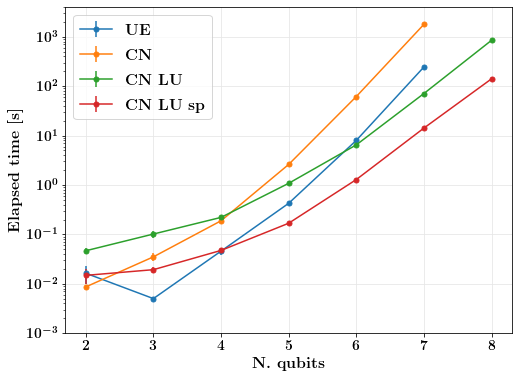

In [3]:
head = ["N","T_N","err"]

df1 = pd.read_csv('./results/numpy_spectral_evol.txt', header=None, names=head)
df2 = pd.read_csv('./results/numpy_cn.txt'       , header=None, names=head)
df3 = pd.read_csv('./results/numpy_cn_LU.txt'    , header=None, names=head)
df4 = pd.read_csv('./results/numpy_cn_LU_sp.txt' , header=None, names=head)

fig, ax = plt.subplots(1, 1, figsize=(8,6))

i1 = 0
i2 = 1
i3 = 2
i4 = 3

ax.errorbar(df1['N'], df1['T_N'], yerr=df1['err'], fmt='-o', markerfacecolor=col[i1], color=col[i1], ecolor=col[i1],label=r'\bf{SM}',alpha=1,markersize=5)
ax.errorbar(df2['N'], df2['T_N'], yerr=df2['err'], fmt='-o', markerfacecolor=col[i2], color=col[i2], ecolor=col[i2],label=r'\bf{CN}',alpha=1,markersize=5)
ax.errorbar(df3['N'], df3['T_N'], yerr=df3['err'], fmt='-o', markerfacecolor=col[i3], color=col[i3], ecolor=col[i3],label=r'\bf{CN LU}',alpha=1,markersize=5)
ax.errorbar(df4['N'], df4['T_N'], yerr=df4['err'], fmt='-o', markerfacecolor=col[i4], color=col[i4], ecolor=col[i4],label=r'\bf{CN LU sp}',alpha=1,markersize=5)

ax.set_xlabel(r'\bf{N. qubits}',fontsize=16)
ax.set_ylabel(r'\bf{Elapsed time [s]}',fontsize=16)
ax.grid(color='0.9')
ax.set_yscale('log')
ax.set_ylim(0.001,4000)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='best',fontsize=16)

plt.savefig("plots/time_numpy.pdf", bbox_inches='tight')
plt.show()

## Tensorflow implementation

### Timing analysis for time evolution solvers 

#### CPU

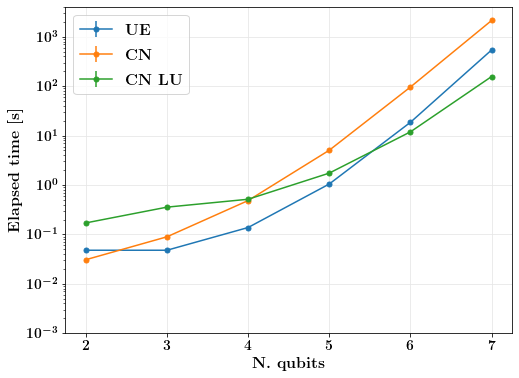

In [4]:
head = ["N","T_N","err"]

df1 = pd.read_csv('./results/tensorflow_CPU_spectral_evol.txt', header=None, names=head)
df2 = pd.read_csv('./results/tensorflow_CPU_cn.txt'       , header=None, names=head)
df3 = pd.read_csv('./results/tensorflow_CPU_cn_LU.txt'    , header=None, names=head)

fig, ax = plt.subplots(1, 1, figsize=(8,6))

i1 = 0
i2 = 1
i3 = 2

ax.errorbar(df1['N'], df1['T_N'], yerr=df1['err'], fmt='-o', markerfacecolor=col[i1], color=col[i1], ecolor=col[i1],label=r'\bf{SM}',alpha=1,markersize=5)
ax.errorbar(df2['N'], df2['T_N'], yerr=df2['err'], fmt='-o', markerfacecolor=col[i2], color=col[i2], ecolor=col[i2],label=r'\bf{CN}',alpha=1,markersize=5)
ax.errorbar(df3['N'], df3['T_N'], yerr=df3['err'], fmt='-o', markerfacecolor=col[i3], color=col[i3], ecolor=col[i3],label=r'\bf{CN LU}',alpha=1,markersize=5)

ax.set_xlabel(r'\bf{N. qubits}',fontsize=16)
ax.set_ylabel(r'\bf{Elapsed time [s]}',fontsize=16)
ax.grid(color='0.9')
ax.set_yscale('log')
ax.set_ylim(0.001,4000)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='best',fontsize=16)

plt.savefig("plots/time_tensorflow_CPU.pdf", bbox_inches='tight')
plt.show()

#### GPU

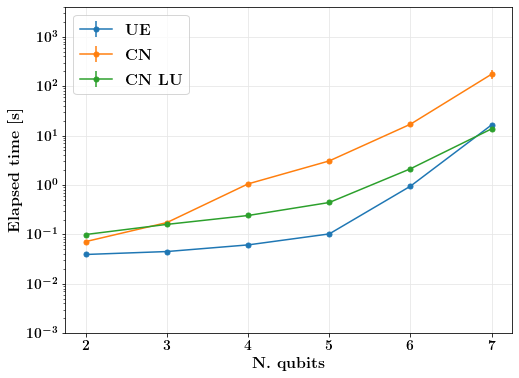

In [5]:
head = ["N","T_N","err"]

df1 = pd.read_csv('./results/tensorflow_GPU_spectral_evol.txt', header=None, names=head)
df2 = pd.read_csv('./results/tensorflow_GPU_cn.txt'       , header=None, names=head)
df3 = pd.read_csv('./results/tensorflow_GPU_cn_LU.txt'    , header=None, names=head)

fig, ax = plt.subplots(1, 1, figsize=(8,6))

i1 = 0
i2 = 1
i3 = 2

ax.errorbar(df1['N'], df1['T_N'], yerr=df1['err'], fmt='-o', markerfacecolor=col[i1], color=col[i1], ecolor=col[i1],label=r'\bf{SM}',alpha=1,markersize=5)
ax.errorbar(df2['N'], df2['T_N'], yerr=df2['err'], fmt='-o', markerfacecolor=col[i2], color=col[i2], ecolor=col[i2],label=r'\bf{CN}',alpha=1,markersize=5)
ax.errorbar(df3['N'], df3['T_N'], yerr=df3['err'], fmt='-o', markerfacecolor=col[i3], color=col[i3], ecolor=col[i3],label=r'\bf{CN LU}',alpha=1,markersize=5)

ax.set_xlabel(r'\bf{N. qubits}',fontsize=16)
ax.set_ylabel(r'\bf{Elapsed time [s]}',fontsize=16)
ax.grid(color='0.9')
ax.set_yscale('log')
ax.set_ylim(0.001,4000)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='best',fontsize=16)

plt.savefig("plots/time_tensorflow_GPU.pdf", bbox_inches='tight')
plt.show()

## Spectral method solver comparison

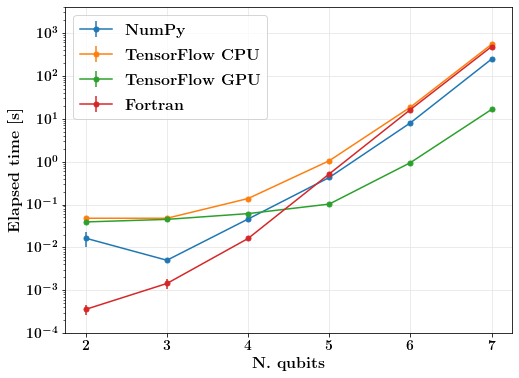

In [6]:
head = ["N","T_N","err"]

df1 = pd.read_csv('./results/numpy_spectral_evol.txt', header=None, names=head)
df2 = pd.read_csv('./results/tensorflow_CPU_spectral_evol.txt'       , header=None, names=head)
df3 = pd.read_csv('./results/tensorflow_GPU_spectral_evol.txt'    , header=None, names=head)
df4 = pd.read_csv('./results/fortran.txt' , header=None, names=head)

fig, ax = plt.subplots(1, 1, figsize=(8,6))

i1 = 0
i2 = 1
i3 = 2
i4 = 3

ax.errorbar(df1['N'], df1['T_N'], yerr=df1['err'], fmt='-o', markerfacecolor=col[i1], color=col[i1], ecolor=col[i1],label=r'\bf{NumPy}',alpha=1,markersize=5)
ax.errorbar(df2['N'], df2['T_N'], yerr=df2['err'], fmt='-o', markerfacecolor=col[i2], color=col[i2], ecolor=col[i2],label=r'\bf{TensorFlow CPU}',alpha=1,markersize=5)
ax.errorbar(df3['N'], df3['T_N'], yerr=df3['err'], fmt='-o', markerfacecolor=col[i3], color=col[i3], ecolor=col[i3],label=r'\bf{TensorFlow GPU}',alpha=1,markersize=5)
ax.errorbar(df4['N'], df4['T_N'], yerr=df4['err'], fmt='-o', markerfacecolor=col[i4], color=col[i4], ecolor=col[i4],label=r'\bf{Fortran}',alpha=1,markersize=5)


ax.set_xlabel(r'\bf{N. qubits}',fontsize=16)
ax.set_ylabel(r'\bf{Elapsed time [s]}',fontsize=16)
ax.grid(color='0.9')
ax.set_yscale('log')
ax.set_ylim(0.0001,4000)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='best',fontsize=16)

plt.savefig("plots/timing_spectral_comparison.pdf", bbox_inches='tight')
plt.show()